In [29]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
#df = pd.read_csv("C:\\Users\\aboser\\Documents\\GitHub\\PM_prediction\\Data\\Final_DFs\\Train.csv")
df = pd.read_csv(r"C:\Users\phili\Documents\Anna-Project\PM_prediction\Data\Final_DFs\Train.csv")

# remove NaN's VVVVV (this somehow lowers the r2 score significantly!!!)

#df = df.dropna()
#df = df.reset_index()

### VVV reduces ability of forest :( don't use
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy="most_frequent")
#df = pd.DataFrame(imp.fit_transform(df),columns=df.columns)
# day_dummies = pd.get_dummies(df['Day'])
# df = pd.concat([df,day_dummies], axis = 1)

In [31]:
df.head()

,Unique,Id,Day,Lat,Lon,Elevation,Emissions,Forest,Roads,Streets,...,Plumes_Med,Plumes_Low,Max_Temp,Precip,Rel_Humidity,Wind_Dir,BLH,AOD,PM,Max_Wind
0,1131_1,1131,1,36.840574,-121.366314,122.986002,0.0,0,0.0,0.191756,...,0,0,53.4,0.0,67.0,251.0,758.111816,NaN,3.7,-999.0
1,1131_100,1131,100,36.840574,-121.366314,122.986002,0.0,0,0.0,0.191756,...,0,0,64.1,0.0,48.0,308.0,1155.824219,NaN,2.6,-999.0
2,1131_101,1131,101,36.840574,-121.366314,122.986002,0.0,0,0.0,0.191756,...,0,0,62.7,0.0,64.0,200.0,1162.292725,NaN,2.9,-999.0
3,1131_102,1131,102,36.840574,-121.366314,122.986002,0.0,0,0.0,0.191756,...,0,0,67.7,0.0,68.0,221.0,263.273407,NaN,0.5,-999.0
4,1131_104,1131,104,36.840574,-121.366314,122.986002,0.0,0,0.0,0.191756,...,0,0,60.1,0.0,44.0,314.0,1268.919434,0.097667,2.4,-999.0


In [32]:
df.columns

Index(['Unique', 'Id', 'Day', 'Lat', 'Lon', 'Elevation', 'Emissions', 'Forest',
       'Roads', 'Streets', 'Plumes_High', 'Plumes_Med', 'Plumes_Low',
       'Max_Temp', 'Precip', 'Rel_Humidity', 'Wind_Dir', 'BLH', 'AOD', 'PM',
       'Max_Wind'],
      dtype='object')

In [33]:
features = ['Day', 'Elevation', 'Emissions', 'Forest', 'Roads', 'Streets', 'Plumes_High', 
            'Plumes_Med', 'Plumes_Low', 'Max_Temp', 'Max_Wind', 'Precip', 'Rel_Humidity', 
            'Wind_Dir', 'BLH', 'AOD']

'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Don't forget to implement this later!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
'''
cat_features = [0, 3, 6, 7, 8]
'''
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''
target_col = 'PM'

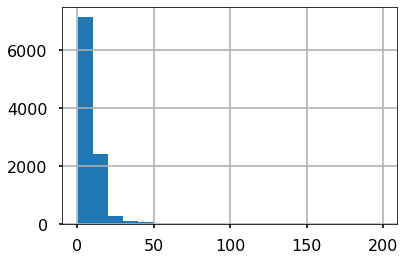

In [34]:
df['PM'].hist(bins=20)

In [35]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 hours 47 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"7 days, 7 hours and 53 minutes"
H2O_cluster_name:,H2O_from_python_phili_1cokxf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.950 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,10 hours 47 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"7 days, 7 hours and 53 minutes"
H2O_cluster_name:,H2O_from_python_phili_1cokxf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.950 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [ ]:
import gc
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold


X = df[features]
y = df[target_col]
y=y.astype('int')

n_fold = 10

kf = GroupKFold(n_fold)
split = kf.split(X=X, y=y, groups=df['Id'])

n_boost_rounds = 1000
early_stopping_rounds = 200

train_pred = np.zeros((len(y)))
feature_importance_df = pd.DataFrame()
models = []

for i, (train_idx, test_idx) in enumerate(split):
    print(f'Starting training fold {i}.')
    _ = gc.collect()

    predictors= features
    response= target_col
    train= h2o.H2OFrame(pd.concat([X.loc[train_idx],  y.loc[train_idx]], axis=1, sort=False))
    valid= h2o.H2OFrame(pd.concat([X.loc[test_idx],  y.loc[test_idx]], axis=1, sort=False))
    
    rf_train = H2ORandomForestEstimator(ntrees=500,
                                    max_depth = 30,
                                    sample_rate=1,
                                    #verbose=True,
                                    binomial_double_trees=True)
    
    rf_train.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)

    #models.append(model)
    prediction = rf_train.predict(valid).as_data_frame().to_numpy()
    prediction = prediction.reshape(prediction.shape[0],)
    print(prediction.shape)
    train_pred[test_idx] = prediction
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    #fold_importance_df["importance"] = model.feature_importance(importance_type='gain',iteration=model.best_iteration)
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    '''
    rf_train = sklearn.ensemble.RandomForestClassifier()
    model = rf_train.fit(X.loc[train_idx],y.loc[train_idx])
    models.append(model)
    
    train_pred[test_idx] = model.predict(X.loc[test_idx])    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    #fold_importance_df["importance"] = model.feature_importance(importance_type='gain',iteration=model.best_iteration)
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    '''

Starting training fold 0.
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████

In [55]:
from sklearn.metrics import r2_score

r2_score(y_true=df['PM'], y_pred=train_pred)

0.635714779797264

SyntaxError: invalid syntax (<ipython-input-19-6d66a2857015>, line 2)